# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # ...

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.SpinGroups.make(l, j)
reaction2 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = TAZ.SpinGroups.make(l[:1], j[:1])
reaction1 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior)
Posterior_1 = runMaster.WigBayes(verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior)
Posterior_2 = runMaster.WigBayes(verbose=True)

Preparing level-spacings


Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00157
Average Error for False Probability = 0.00195



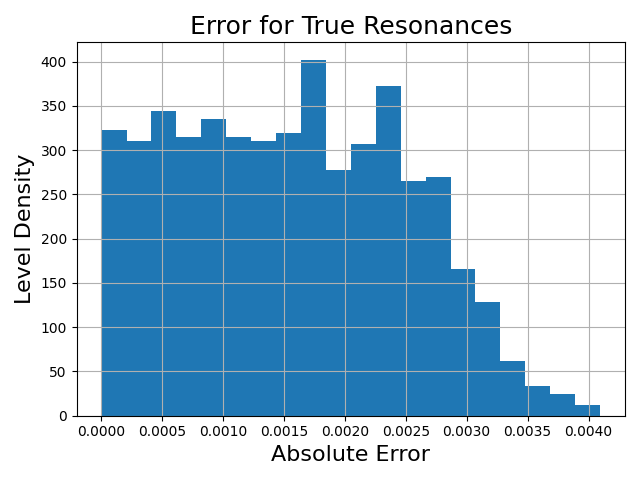

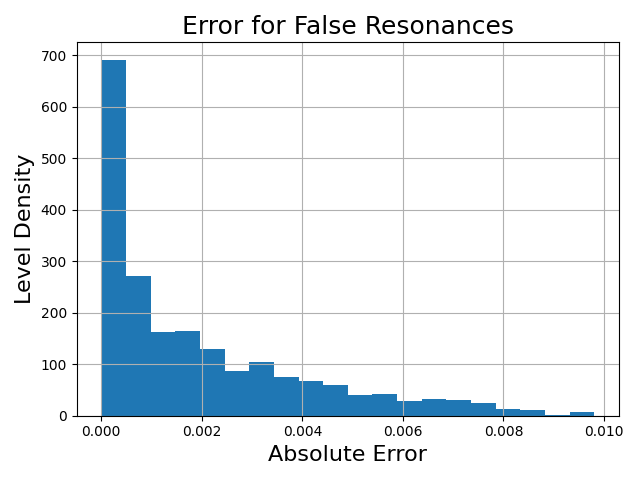

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.996277 0.996282]
 [0.965474 0.965243]
 [0.791759 0.790022]
 [0.975661 0.975455]
 [0.990371 0.990285]
 [0.984316 0.984177]
 [0.889613 0.888782]
 [0.681647 0.679405]
 [0.813234 0.812915]
 ...
 [0.954266 0.953803]
 [0.877467 0.876678]
 [0.913144 0.912639]
 [0.979968 0.979712]
 [0.872028 0.871014]
 [0.943631 0.943154]
 [0.96922  0.968867]
 [0.88839  0.887262]
 [0.779966 0.77824 ]]

False Spingroup Posterior:
[[0.003723 0.003652]
 [0.034526 0.034362]
 [0.208241 0.207616]
 [0.024339 0.024224]
 [0.009629 0.009576]
 [0.015684 0.015619]
 [0.110387 0.109863]
 [0.318353 0.316694]
 [0.186766 0.185786]
 ...
 [0.045734 0.045694]
 [0.122533 0.122252]
 [0.086856 0.086672]
 [0.020032 0.02008 ]
 [0.127972 0.12774 ]
 [0.056369 0.056311]
 [0.03078  0.030806]
 [0.11161  0.111411]
 [0.220034 0.219416]]
